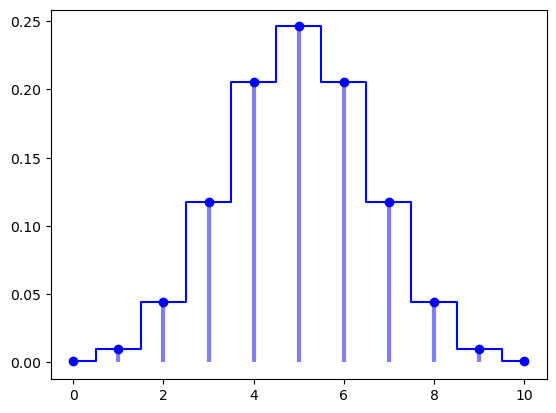

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt


k = np.arange(0,11)

y = binom.pmf(k, n=10,  p=0.5)

plt.plot(k, y, 'bo')
plt.vlines(k,0,y, ec='b', alpha=0.5, lw=3, ls='-')
plt.step(k, y, where='mid', c='b')



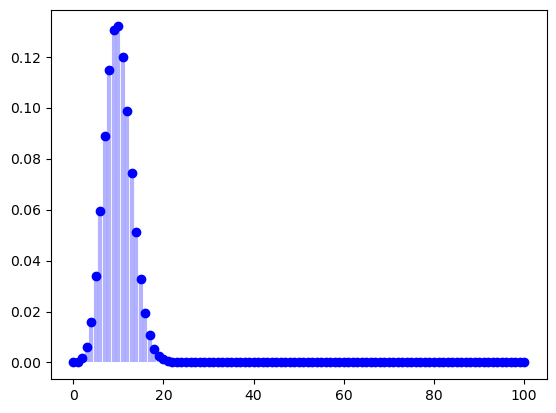

In [3]:
k = np.arange(0,101, 1)
y = binom.pmf(k, n=100, p=0.1)

plt.plot(k, y, 'bo')
plt.vlines(k, 0, y, ec='b', alpha=0.3, lw=3)

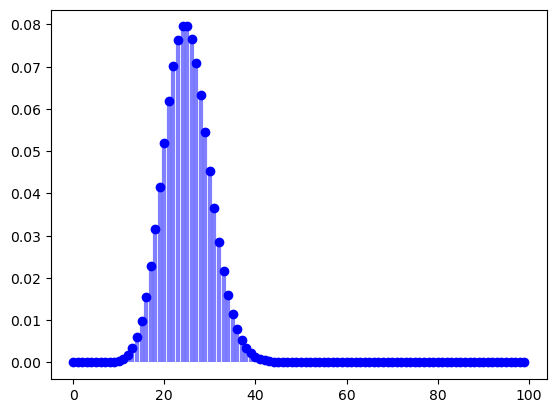

In [4]:
from scipy.stats import poisson

k = np.arange(0,100)

y = poisson.pmf(k, mu=25)

plt.plot(k, y, 'bo')
plt.vlines(k, 0, y, alpha=0.5, lw=3, ec='b')

<ErrorbarContainer object of 3 artists>

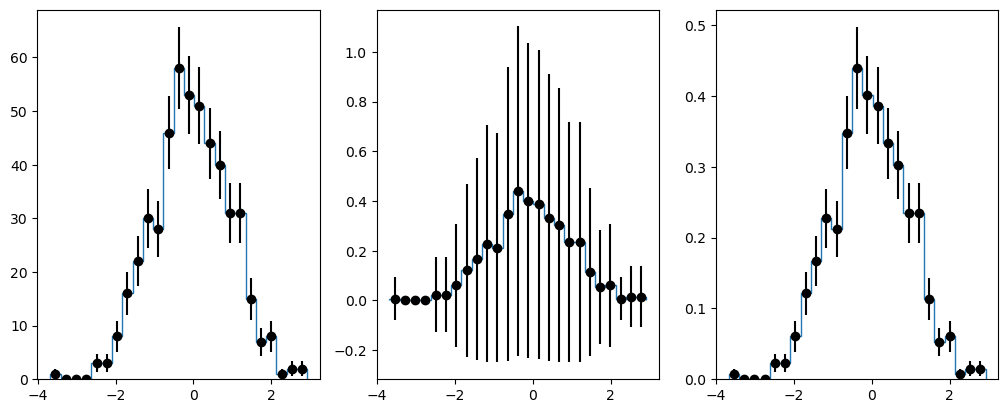

In [5]:
fig, ax = plt.subplots(1,3, figsize=(12.4,4.8))

data = np.random.normal(size=500)

# make histogram
nh, xe = np.histogram(data, bins=25)
cx = 0.5*(xe[:-1]+xe[1:])

# plot as event count
ax[0].stairs(nh, xe)
ax[0].errorbar( cx, nh, nh**0.5, fmt='ko' )

# plot as density using naive sqrt
nh, xe = np.histogram(data, bins=xe, density=True)
ax[1].stairs(nh, xe)
ax[1].errorbar( cx, nh, nh**0.5, fmt='ko' )

# plot as density with appropriate scaling
bw = np.diff(xe)
scf = len(data)*bw
ax[2].stairs(nh, xe)
ax[2].errorbar( cx, nh, (nh/scf)**0.5, fmt='ko' )

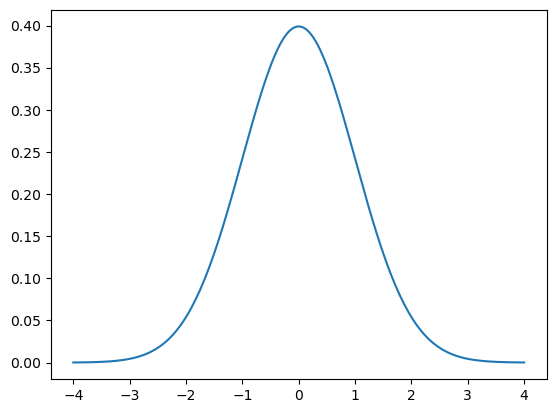

In [7]:
from scipy.stats import norm

x = np.linspace(-4,4,200)

plt.plot(x, norm.pdf(x))

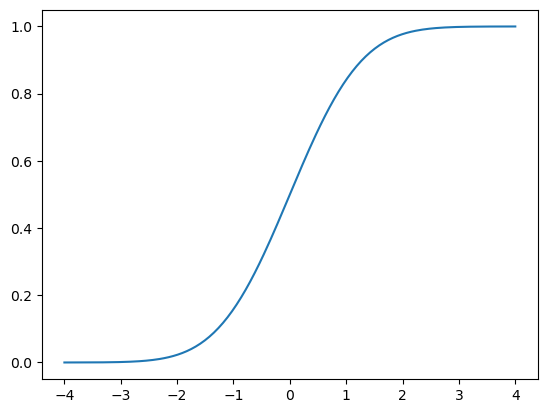

In [8]:
plt.plot(x, norm.cdf(x))

In [12]:
# Multivariate Normal
from scipy.stats import multivariate_normal as mvn

# make and freeze the mvn object
mu = [1,-2]
cov = [[1,1],[1,4]]
pdf = mvn(mu,cov)

# for demo compute sigmas and corr
sg = np.sqrt( np.diag(cov) )
invS = (1/sg).reshape((2,1))
corr = invS.T * cov * invS

print(sg)
print(corr)


[1. 2.]
[[1.  0.5]
 [0.5 1. ]]


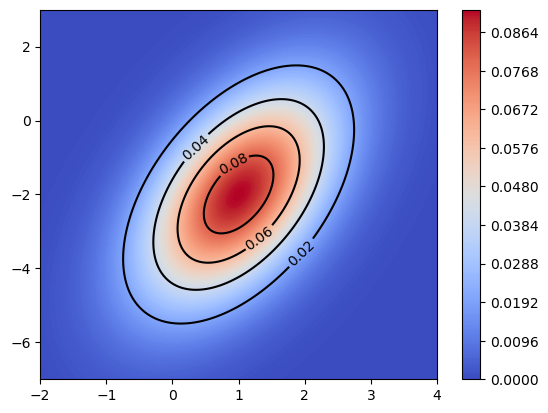

In [13]:
# make a grid of points to draw
x = np.linspace(-2,4,200)
y = np.linspace(-7,3,200)
X, Y = np.meshgrid(x,y)
x, y = X.T, Y.T
pos = np.dstack((x,y))

# evaluate grid and plot
z = pdf.pdf(pos)

im = plt.contourf(x, y, z, levels=250, cmap='coolwarm')
cs = plt.contour(x, y, z, levels=4, colors='k')
plt.clabel(cs, cs.levels, inline=True)
plt.colorbar(im)


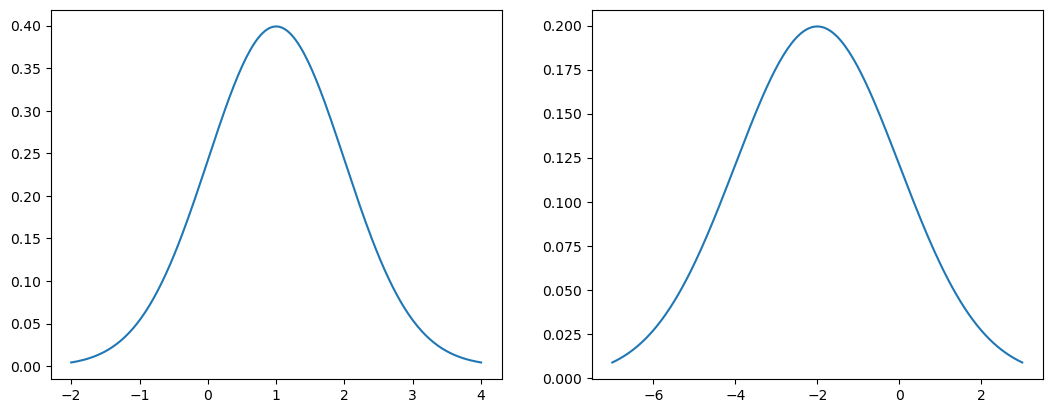

In [14]:
# Marginals
# f(X,Y) --> g(X) = int f(X,Y) dX 
X_marg = norm( mu[0], sg[0] )
Y_marg = norm( mu[1], sg[1] )

x = np.linspace(-2,4,200)
y = np.linspace(-7,3,200)
fig, ax = plt.subplots(1,2, figsize=(12.8,4.8))
ax[0].plot(x, X_marg.pdf(x))
ax[1].plot(y, Y_marg.pdf(y))

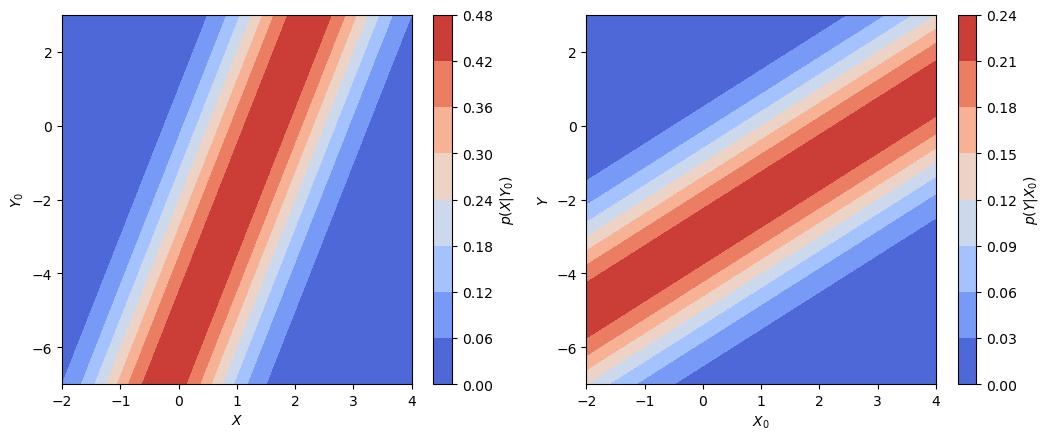

In [15]:
# Conditionals
x = np.linspace(-2,4,200)
y = np.linspace(-7,3,200)
X, Y = np.meshgrid(x,y)
x, y = X.T, Y.T
pos = np.dstack((x,y))

z = pdf.pdf(pos)

z_XgivY = z / Y_marg.pdf( y )
z_YgivX = z / X_marg.pdf( x )

fig, ax = plt.subplots(1, 2, figsize=(12.4, 4.8) )

im = ax[0].contourf( x, y, z_XgivY, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[0])
ax[0].set_xlabel('$X$')
ax[0].set_ylabel('$Y_0$')
cb.set_label('$p(X|Y_0)$')

im = ax[1].contourf( x, y, z_YgivX, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel('$X_0$')
ax[1].set_ylabel('$Y$')
cb.set_label('$p(Y|X_0)$')